## 교차검증
* train_data :모델을 학습하는데 사용하는 데이터(모델이 알고 있는 학습할 데이터)
* valid_data:학습한 모델의 성능을 검증한는 데이터(모델이 모르는 학습하지 않을 데이터,모델검증에 사용하는 데이터)
* test_data: 학습한 모델로 예측할 데이터(모델이 모르는 데이터)

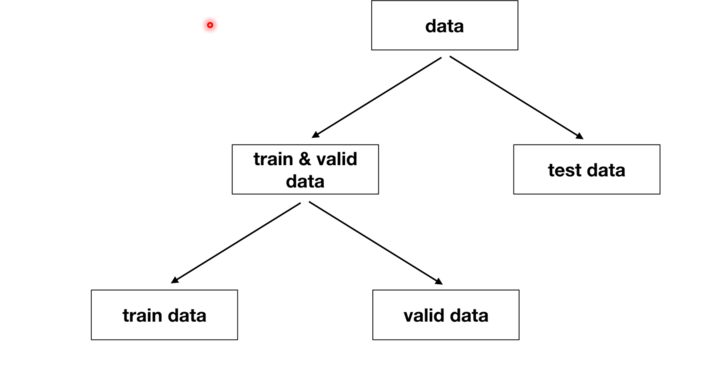

## 검증 세트
* 테스트 세트를 사용하지않고 과대적합인지 과소적합인지 판단하는 방법
* 훈련세트(60%),검증세트(20%),테스트세트(20%)


In [1]:
import pandas as pd
wine = pd.read_csv('http://bit.ly/wine_csv_data')

In [2]:
data=wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(
data, target, test_size=0.2,random_state=42)

In [4]:
print(train_input.shape,test_input.shape)

(5197, 3) (1300, 3)


In [5]:
sub_input, val_input, sub_target,val_target = train_test_split(
train_input,train_target, test_size=0.2,random_state=42)

In [6]:
print(sub_input.shape,val_input.shape)

(4157, 3) (1040, 3)


In [7]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(random_state=42)
dt.fit(sub_input,sub_target)

print(dt.score(sub_input,sub_target))
print(dt.score(val_input,val_target))

0.9971133028626413
0.864423076923077


## 교차검증
* 검증 세트를 떼어내서 평가하는 과정을 여러번 반복, 이 점수를 평균하여 최종검증 점수를 얻음

In [8]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt,train_input,train_target)
print(scores)

{'fit_time': array([0.0038898 , 0.00405097, 0.00439715, 0.00389981, 0.00367999]), 'score_time': array([0.00032902, 0.00031734, 0.00034881, 0.00027514, 0.00025702]), 'test_score': array([0.87019231, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [9]:
import numpy as np
print(np.mean(scores['test_score']))

0.8554925223957948


In [10]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt,train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.8554925223957948


In [11]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt,train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8581873425226026


## 하이퍼파라미터튜닝

In [12]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [13]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [14]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [15]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [16]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [17]:
print(gs.cv_results_['mean_test_score'])

[0.86800067 0.86453617 0.86492226 0.86780891 0.86761605]


In [18]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [19]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)}

In [20]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [21]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [22]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731
